In [72]:
import numpy
from tensorflow import keras
from keras.constraints import MaxNorm
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
#keras.model
from keras.models import Sequential
from keras.models import load_model
#keras.layers
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
#sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
#keras.callbacks
from keras.callbacks import EarlyStopping
#sklearn.metrics
from sklearn.metrics import confusion_matrix

In [73]:
import pandas as pd
import numpy as np

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [75]:
#load data. x is image and y is label
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Print Information
print("x_train.shape: " , x_train.shape)
print(f"Dimensions of each photo: {x_train.shape[1:]}")
print(f"{x_train.shape[0]} train_samples")
print(f"{x_test.shape[0]} test_samples")

x_train.shape:  (50000, 32, 32, 3)
Dimensions of each photo: (32, 32, 3)
50000 train_samples
10000 test_samples


In [92]:
#Labels of dataset categories
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



|  Class number | Class name       |
|--------------|-----------------|
| 0            | airplane        |
| 1            | automobile        |
| 2            | bird           |
| 3            | cat            |
| 4            | deer       |
| 5            | dog              |
| 6            | frog            |
| 7            | horse          |
| 8            | ship            |
| 9            | truck             |



label: [6] = frog


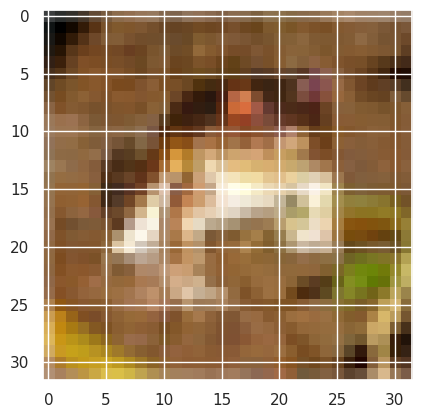

In [108]:
#Show a sample image of dataset
plt.imshow()
print(f"label: {y_train[0]} = { labels[int(y_train[0])] }")

**x_train[0]**  is first image of dataset

y_train[0].shape is uint8 .and index just to be int.So we use **int(y_train[0])**


---



In [77]:
#Normalize the inputs : 0 _ 255 -> 0 _ 1
x_train_floated = x_train.astype('float32')
x_test_floated = x_test.astype('float32')
x_train_norm = x_train_floated / 255.0
x_test_norm = x_test_floated / 255.0

Data Normalization: When training the model, the data is usually normalized to optimize its scale and solve the scaling problem.


---



In [78]:
#Showing y_train
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

So it is necessary to convert the categories with One Hot Encoder




In [79]:
# One-hot encode
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [80]:
#y_train_onehot
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
#Get number of class, input_shape
num_class = y_train_onehot.shape[1]
input_shape = x_train_norm.shape[1:]
print(f"num_class: {num_class}")
print(f"input_shape: {input_shape}")

num_class: 10
input_shape: (32, 32, 3)


In [119]:
#Set Parameters
batch_size = 64
epochs = 60

In [83]:
model = Sequential()
#32 filters with dimensions of 3 by 3
model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#64 filters with dimensions of 3 by 3
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [84]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

In [86]:
# Verify the input data shapes
print(x_train_norm.shape)
print(y_train_onehot.shape)
print(x_test_norm.shape)
print(y_test_onehot.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [87]:
result = model.fit(x_train_norm, y_train_onehot, validation_data =(x_test_norm, y_test_onehot ), epochs= epochs ,batch_size = batch_size)

Epoch 1/60
782/782 [==============================] - 15s 14ms/step - loss: 1.4870 - accuracy: 0.4699 - val_loss: 1.1508 - val_accuracy: 0.5800
Epoch 2/60
782/782 [==============================] - 10s 13ms/step - loss: 1.0649 - accuracy: 0.6260 - val_loss: 0.9493 - val_accuracy: 0.6651
Epoch 3/60
782/782 [==============================] - 10s 13ms/step - loss: 0.9071 - accuracy: 0.6854 - val_loss: 0.8219 - val_accuracy: 0.7157
Epoch 4/60
782/782 [==============================] - 10s 13ms/step - loss: 0.8170 - accuracy: 0.7152 - val_loss: 0.8182 - val_accuracy: 0.7131
Epoch 5/60
782/782 [==============================] - 11s 14ms/step - loss: 0.7504 - accuracy: 0.7382 - val_loss: 0.6821 - val_accuracy: 0.7618
Epoch 6/60
782/782 [==============================] - 11s 14ms/step - loss: 0.7075 - accuracy: 0.7562 - val_loss: 0.6318 - val_accuracy: 0.7770
Epoch 7/60
782/782 [==============================] - 11s 14ms/step - loss: 0.6665 - accuracy: 0.7693 - val_loss: 0.6314 - val_accuracy:

In [88]:
result.history

{'loss': [1.487006425857544,
  1.0648759603500366,
  0.907103955745697,
  0.8170375227928162,
  0.7504168152809143,
  0.7074684500694275,
  0.6665016412734985,
  0.6419447660446167,
  0.6084102988243103,
  0.5947174429893494,
  0.5620099306106567,
  0.547947108745575,
  0.5314080715179443,
  0.5245746374130249,
  0.5020450949668884,
  0.49586936831474304,
  0.48531901836395264,
  0.4742147624492645,
  0.45909082889556885,
  0.45536139607429504,
  0.4454635977745056,
  0.4379250705242157,
  0.43403083086013794,
  0.4251742959022522,
  0.4144878089427948,
  0.40976959466934204,
  0.4091915488243103,
  0.40159210562705994,
  0.3988780081272125,
  0.3859325647354126,
  0.38892239332199097,
  0.3842680752277374,
  0.376709908246994,
  0.3802749514579773,
  0.3749848008155823,
  0.3686180114746094,
  0.3612765967845917,
  0.36564901471138,
  0.35435375571250916,
  0.3537643253803253,
  0.3535446226596832,
  0.34892538189888,
  0.34166839718818665,
  0.34465762972831726,
  0.33881768584251404

In [89]:
for key, val in result.history.items():
  print(key,": " , val)

loss :  [1.487006425857544, 1.0648759603500366, 0.907103955745697, 0.8170375227928162, 0.7504168152809143, 0.7074684500694275, 0.6665016412734985, 0.6419447660446167, 0.6084102988243103, 0.5947174429893494, 0.5620099306106567, 0.547947108745575, 0.5314080715179443, 0.5245746374130249, 0.5020450949668884, 0.49586936831474304, 0.48531901836395264, 0.4742147624492645, 0.45909082889556885, 0.45536139607429504, 0.4454635977745056, 0.4379250705242157, 0.43403083086013794, 0.4251742959022522, 0.4144878089427948, 0.40976959466934204, 0.4091915488243103, 0.40159210562705994, 0.3988780081272125, 0.3859325647354126, 0.38892239332199097, 0.3842680752277374, 0.376709908246994, 0.3802749514579773, 0.3749848008155823, 0.3686180114746094, 0.3612765967845917, 0.36564901471138, 0.35435375571250916, 0.3537643253803253, 0.3535446226596832, 0.34892538189888, 0.34166839718818665, 0.34465762972831726, 0.33881768584251404, 0.33592772483825684, 0.33256909251213074, 0.33480992913246155, 0.3310418725013733, 0.32

<Axes: >

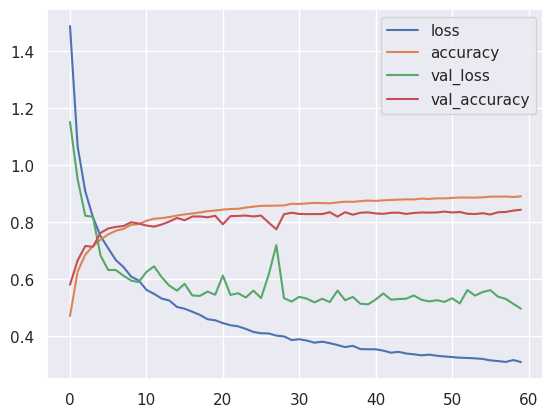

In [90]:
pd.DataFrame(result.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

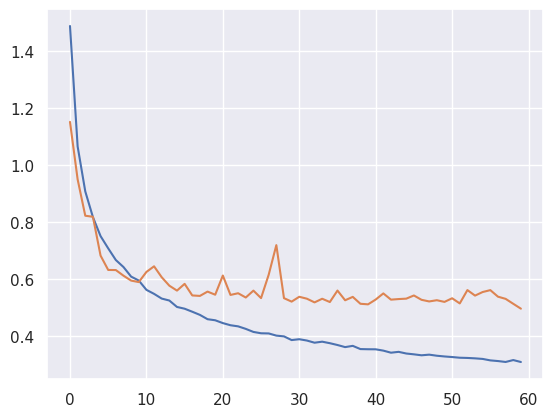

In [120]:
#Show Separately
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

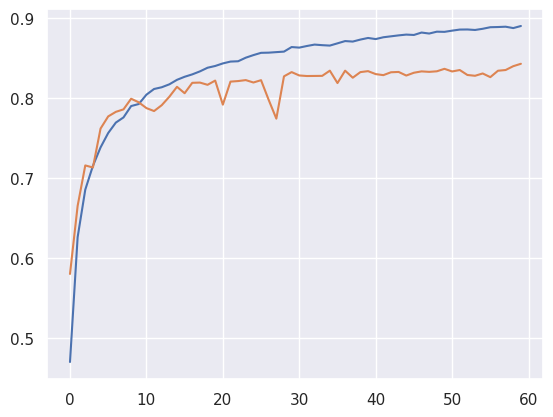

In [121]:
#Show Separately
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.show

In [123]:
#Save Model
model.save('CNN_cifar10.h5')

In [113]:
#Predict test images
predictions = model.predict(x_test_norm)
print(f"shape of predictons: {predictions.shape}")
print(f"The type predictions:  {type(predictions)}")
print(f"The type of each element in predictions:  {type(predictions[0])}")
print(f"The type of each element: {predictions.dtype}")
predictions

313/313 [==============================] - 2s 4ms/step
shape of predictons: (10000, 10)
The type predictions:  <class 'numpy.ndarray'>
The type of each element in predictions:  <class 'numpy.ndarray'>
The type of each element: float32


array([[1.64904941e-05, 3.06136053e-06, 1.69115592e-05, ...,
        8.60806097e-07, 1.10955420e-06, 6.30965303e-07],
       [1.11693935e-05, 3.36761656e-03, 1.02939868e-09, ...,
        2.40943515e-10, 9.96609747e-01, 1.13798533e-05],
       [6.89987326e-03, 1.41464397e-02, 4.18909906e-07, ...,
        2.88077644e-07, 9.78046715e-01, 8.99320294e-04],
       ...,
       [1.47857918e-07, 1.91396012e-07, 8.67151190e-04, ...,
        6.78268028e-04, 1.20210905e-06, 2.43753379e-06],
       [3.82736675e-03, 9.95425999e-01, 7.26060671e-06, ...,
        2.12566491e-07, 7.88250145e-06, 7.13159214e-04],
       [7.37044603e-09, 8.89770320e-08, 2.90375993e-07, ...,
        9.99786913e-01, 2.06407869e-08, 2.57832031e-08]], dtype=float32)

In [114]:
#Find the max along the column of each row
pred = np.argmax(predictions, axis = 1)
print(f"shape of pred: {pred.shape}")
print(f"pred: {pred}")


shape of pred: (10000,)
pred: [3 8 8 ... 5 1 7]


In [115]:
# Reshape y_test
y_test_reshaped = np.reshape(y_test, (10000,))
print(f"pred: {y_test_reshaped}")

pred: [3 8 8 ... 5 1 7]


In [116]:
# Compare elements at the same index
comparison = (y_test_reshaped == pred)

# Count the number of matching elements
num_matches = np.sum(comparison)

# Calculate the accuracy
accuracy = num_matches / len(y_test_reshaped)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.8428


In [117]:
y_test.dtype

dtype('uint8')

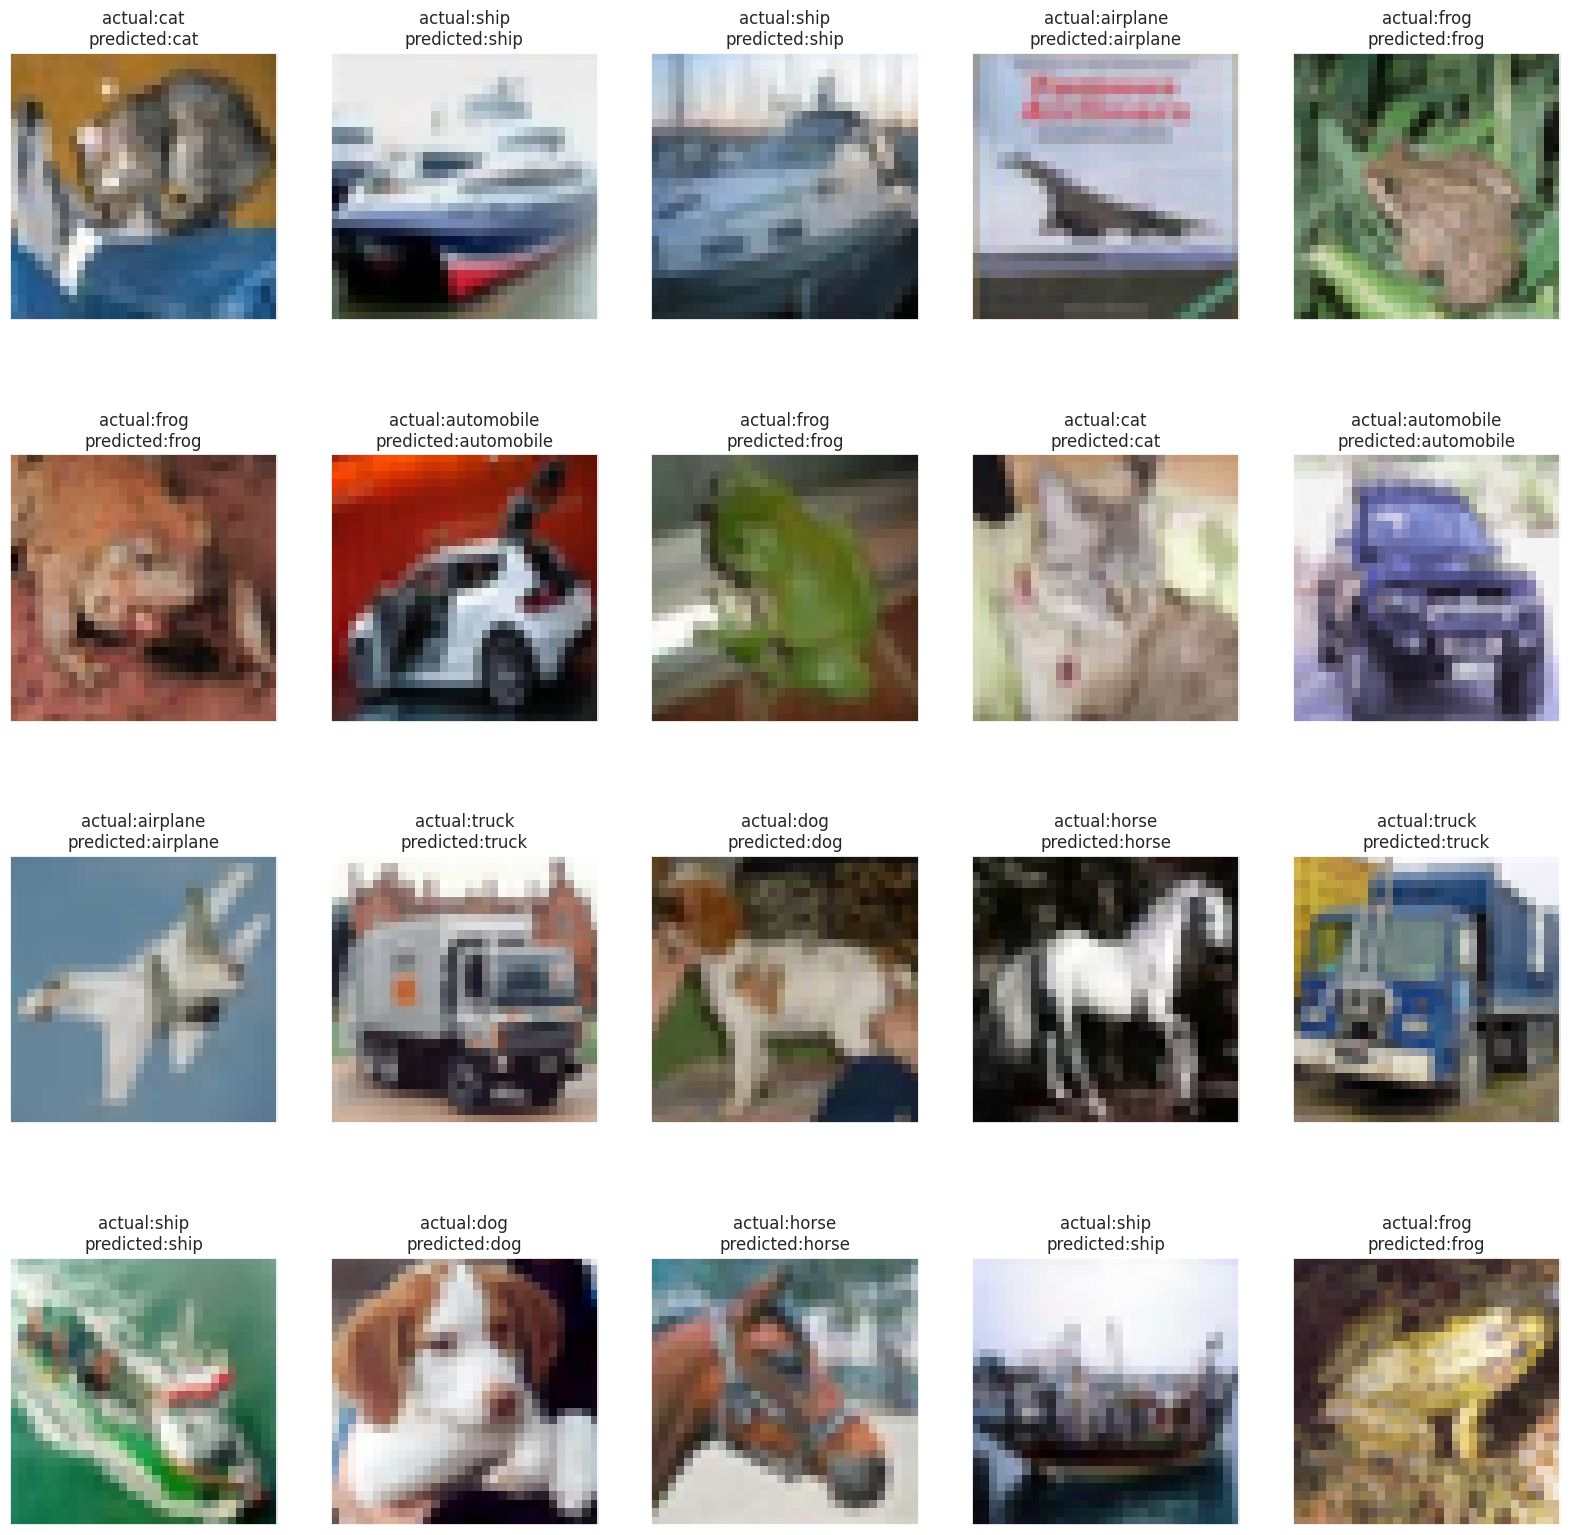

In [124]:
#Sow some predictions
ncols = 5
nrows = 4
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=False,sharey=True, figsize=(20, 20))
index = 0
for i in range(4):
    for j in range(5):
        axes[i,j].set_title('actual:' + labels[int(y_test_reshaped[index])] + '\n' + 'predicted:' + labels[pred[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()



---



---



**In order to work, we normalize the x values, which is the same as taking the pixel values between 0 and 1 and the decimal state, and we make the y values one hot. Why during predict, when I give the x_test value that is not normalized, the detection error rate is higher than when the x-test is normal I'll give you the built one. Well, I've already seen the training model. So why is it different for him?**

When you normalize x-values (ranging between 0 and 1), you bring the inputs to a specific scale on which the model is trained. This helps the model adapt to the real, usually standard, values present in the training data.

If you feed the model unnormalized test data (x_test), the model will likely not be consistent with the scale used in training on the normalized data. This means that x_test values are not between 0 and 1 and the model is not able to work with them correctly.

Typically, models trained on normalized data expect the inputs to be on the same scale as they were trained on. If the test data is not normalized, the scale of the data will change and this can lead to errors in the predictions and decrease the accuracy of the model.

Therefore, to properly use the model trained on the normalized data, you must train the test data with the same normalization method as before and convert their scale to the training scale. By doing this, the test data will be consistent with the model's expectations and you can get better results.

The reason for this difference in detection error may be related to two factors: normalization and the difference between training and testing samples.

1. Data normalization: When training the model, the data is usually normalized to optimize its scale and solve the scaling problem. But when applying the model to the test data, if the data is not normalized, the difference in the scale of the data may cause the model to not be able to work properly on them and we will have more error in the prediction.

2. Difference between training and testing samples: Our training and testing data may have different distributions. This difference could be due to differences in data sets or data types. As a result, the model may perform less accurately and have more error against test data that have a different distribution.

To solve these problems, you can use the following methods:

1. Normalize the test data: Before predicting the data, normalize it to the same as the training data so that their scale matches.

2. Using data matching methods: You can use methods such as data augmentation to reduce the differences between the training and test data. Using these methods, you can artificially transform the test data to match the training data.

3. Use transfer learning methods: If the training data available for your model is limited, you can use transfer learning methods. In this method, you can use a pre-trained model trained on larger data and then apply this model to your test data. This method can significantly improve the performance of the model against the test data compared to the training data.

Overall, the difference in recognition error between training and test data can depend on various factors, including data normalization and differences in the distribution of training and test data. Investigating these factors and applying appropriate methods to reduce the differences can improve the performance of the model against the test data.

***Data augmentation*** methods are methods that use minor changes in the training data to create a set of new data consistent with the training data. These changes may include geometric changes (such as rotation, resizing, scaling, and shifting) and pixel changes (such as color change, noise enhancement, and mirror image). By applying these changes, more variety can be created in the training data and the model can be prepared against different real changes in the test data.

Some common data matching methods include:

1. Rotation: by applying rotation to the image, you can create variety in the viewing angles of the image. The rotation angle can be chosen randomly.

2. Translation: By applying translation to the image, you can create variation in the location of objects in the image. The amount of displacement can be chosen randomly.

3. Zooming in and out (Scaling): By changing the size of the image, you can create variations in the size of objects. The amount of zooming in or out can be chosen randomly.

4. Changing the color and brightness: By changing the color and brightness of the image, you can create variety in the light conditions. For example, you can randomly change the colors or change the brightness of the image.

5. Adding Noise: By adding noise to the image, you can create variety in noise conditions. The amount of noise can be chosen randomly.

6. Mirror image (Mirroring): By applying the mirror image, you can create variety in the direction of the image. For example, flip the image horizontally or vertically.

These methods are only examples of data matching methods and you can use other methods for data matching based on your specific needs. Also, you can use a combination of these methods in order to create more diversity in the training data. These methods can significantly improve model performance against test data, as the model is trained with a greater variety of data and is able to generalize better.

It is important to note that each of these methods may perform better in some problems, so you can test them and choose the methods that are suitable for your problem. Also, to apply these methods, you can use libraries and tools available in different programming languages that give you data matching capabilities.

***Scaling ***(Scaling) is one of the data matching methods that creates variations in the size of objects by changing the size of the image. In fact, by applying this method, the image is enlarged or reduced in scale.

Scaling is usually done using image resizing techniques. Typically, these techniques involve resizing pixels and maintaining the aspect ratio of the image so that the image remains relatively neutral and undistorted.

The amount of zoom in or out for scaling can be chosen randomly. For example, a zoom amount can be chosen randomly from a set of possible values, such as 0.8 (80% zoom) or 1.2 (120% zoom).

Scaling can be useful in many machine vision applications and tasks. For example, in Convolutional Neural Networks, which are used to recognize patterns in images, scaling can significantly improve the recognition of patterns of different sizes. Also, scaling can be useful in object recognition and face recognition tasks because objects and faces may appear in images of different sizes.

According to the types of images and different tasks, different methods of scaling can be used. Various programming tools and libraries usually provide image scaling facilities that you can use in your projects.